In [92]:
#imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import math
from sklearn.inspection import plot_partial_dependence
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [93]:
#loads csv file as pandas dataframe
df = pd.read_csv ('Life_Expectancy_Data.csv')
df.head()
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [94]:

df = df[df['Year'] == 2015]
df = df.drop(['Country', 'Year', 'Status'], axis=1)

#, 'infant deaths', 'percentage expenditure', 'Total expenditure'

names = df.columns
scaler = preprocessing.StandardScaler()
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=names)

df_y = df['Life expectancy '].to_frame()
df_y = df_y.to_numpy()

df_x = scaled_df.drop(['Life expectancy '], axis=1)
print(df_x.columns)
df_x = df_x.to_numpy()


avg_vec = []
for i in range(0, len(df_x[0])):
    avg = 0
    count = 0
    for j in range(0, len(df_x)):
        if (math.isnan(df_x[j][i])):
            count = count + 1
        else:
            avg = avg + df_x[j][i]
    avg_final = avg / (len(df_x) - count)
    avg_vec.append(avg_final)
for i in range(0, len(df_x[0])):
    for j in range(0, len(df_x)):
         if (math.isnan(df_x[j][i])):
                df_x[j][i] = avg_vec[i]
                

        


Index(['Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure',
       'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio',
       'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')


In [95]:
X_train, X_test, y_train, y_test =  train_test_split(df_x,df_y,test_size = 0.2, random_state= 0)

mse: [50.96025152]
intercept: [71.34950653]
coefficient: [[-2.74249522e+00  3.00567177e+01  2.18283795e+00  7.26962286e-01
   8.11302799e-01 -7.78055734e-01 -3.00407416e-01 -3.09245944e+01
   5.49539359e-01  9.11603913e+00  1.06216494e-01 -5.77033257e-01
   2.43616248e-01 -1.99572399e-02 -5.95438811e-01 -3.09719145e-01
   3.58417093e+00  2.96598171e-01]]
score: 0.24406081346985997
[[72.7]
 [69.8]
 [53.1]
 [58.3]
 [61.8]
 [62.3]
 [82.8]
 [67.5]
 [74.4]
 [68.3]
 [76.3]
 [65.8]
 [74.1]
 [82.3]
 [73.5]
 [57.3]
 [54.5]
 [69.4]
 [82.7]
 [58.9]
 [74.6]
 [64.8]
 [63.5]
 [76.7]
 [76.4]
 [71.9]
 [74.6]
 [65.7]
 [59.8]
 [65.7]
 [57.6]
 [62.4]
 [59.6]
 [61.1]
 [77.1]
 [69.7]
 [81.5]]
[[73.37463007]
 [67.00099873]
 [49.35939667]
 [57.40849369]
 [65.15748655]
 [58.6918362 ]
 [83.58509786]
 [73.85164998]
 [75.5415524 ]
 [67.25078256]
 [78.38734909]
 [66.90675316]
 [75.02422268]
 [76.28500105]
 [71.99728035]
 [53.52760594]
 [15.66717588]
 [70.50125488]
 [80.52790863]
 [56.50590528]
 [71.61184396]
 [55

Text(0, 0.5, 'Predictions')

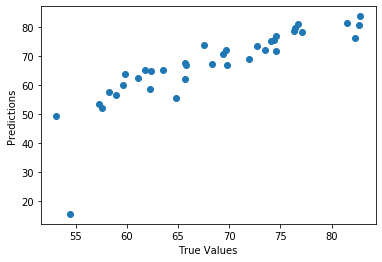

In [96]:
model = LinearRegression().fit(X_train, y_train)
predictions = model.predict(X_test)
#print(predictions[1])
#print(y_test[1])
#find MSE squared error


count = 0
for i in range(0, len(predictions)):
    count = count + (predictions[i] - y_test[i])**2
mse = count / len(predictions)
score = model.score(X_test, y_test)

print('mse:', mse)
print('intercept:', model.intercept_)
print('coefficient:', model.coef_)
print('score:', model.score(X_test, y_test))
print(y_test)
print(predictions)
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

#fix this issue by replacing missing values with the mean of the columns

None


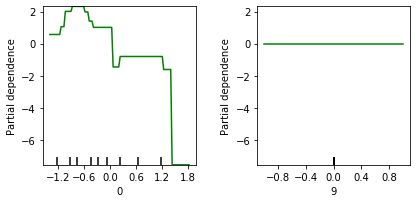

In [111]:
clf = GradientBoostingRegressor(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X_train, y_train.ravel())
features = [0, 9]
print(plot_partial_dependence(clf, X_train, features))

In [ ]:
#1, 3, 9, (4 also)
#Use 0, 4, 15, maybe 17

mse: [12.34126762]
intercept: [72.44794521]
coefficient: [[-2.78718728  1.23964913  0.96180646 -0.56051735  1.03302644 -1.20502218
  -0.34332887  0.27962746 -0.06078358  1.4390975   0.4701505   1.2007458 ]]
score: 0.8169308916638458


Text(0, 0.5, 'Predictions')

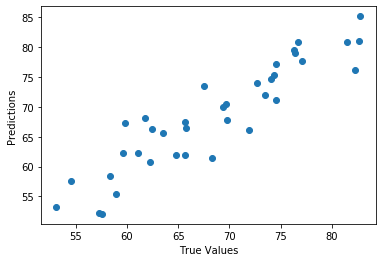

In [110]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
X_train, X_test, y_train, y_test =  train_test_split(df_x,df_y,test_size = 0.2, random_state= 0)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


pca = PCA(.95)
pca = pca.fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

model = LinearRegression().fit(X_train, y_train)
predictions = model.predict(X_test)
#print(predictions[1])
#print(y_test[1])
#find MSE squared error


count = 0
for i in range(0, len(predictions)):
    count = count + (predictions[i] - y_test[i])**2
mse = count / len(predictions)
score = model.score(X_test, y_test)

print('mse:', mse)
print('intercept:', model.intercept_)
print('coefficient:', model.coef_)
print('score:', model.score(X_test, y_test))

plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
#fix this issue by replacing missing values with the mean of the columns